---
# **Verificación experimental de la ley de Malus**
---
Andrés Felipe Riaño Quintanilla     1083928808

Santiago Julio Dávila               1000413445

---
Laboratorio Avanzado I, Instituto de Física, Universidad de Antioquia

## **Introducción**

Considérese una onda electromagnética $\vec{E}=\vec{E}_0\cos(\vec{k}\cdot\vec{r}-\omega t)$, $\vec{B}=\vec{B}_0\cos(\vec{k}\cdot\vec{r}-\omega t)$, con $B_0=cE_0$. El vector de Poynting de dicha onda es dado por $\vec{S}=c^2\epsilon_0\vec{E}\times\vec{B}$. Defínase la _irradiancia_ o _intensidad_ como el promedio de la magnitud del vector de Poynting: $I=\langle S \rangle$. Se puede verificar que

$$
I=\dfrac{c\epsilon_0}{2}E_0^2.
$$


<img src="https://raw.githubusercontent.com/SantiagoJulioD/LabAv1/refs/heads/main/LabAv1-P3/graficas-1.png" alt="drawing" width="600"/>


A continuación, para el análisis del sistema con el polarizador, se adoptará la notación de Dirac para los vectores, pues facilita la explicación operativa de la acción del polarizador en el sistema. Considérese una onda polarizada linealmente: 

$$|E_{in}\rangle=E_0\cos\alpha |H\rangle+E_0\sin\alpha |V\rangle,$$

donde $|H\rangle$ y $|V\rangle$ representan las polarizaciones lineales horizontal y vertical, respectivamente; así, la polarización lineal en ángulo $\alpha$ es una combinación lineal de las polarizaciones horizontal y vertical. Esta luz polarizada incide sobre un polarizador lineal. El polarizador lineal es un dispositivo que filtra la componente de la onda con polarización paralela a una dirección privilegiada, dada por el eje del polarizador. Operativamente, el polarizador puede entenderse como un operador de proyección $\mathcal{P}=|P\rangle\langle P|$, donde $|P\rangle=\cos\theta|H\rangle+\sin\theta|V\rangle$ es la dirección del eje del polarizador. Así pues, el campo óptico emergente del polarizador es dado por:

$$\begin{align*}
|E_{out}\rangle&=\mathcal{P}|E_{in}\rangle\\
&=\langle P|E_{in}\rangle |P\rangle\\
&=(E_0\cos\alpha\cos\theta+E_0\sin\alpha\sin\theta)|P\rangle\\
|E_{out}\rangle&=E_0\cos(\theta-\alpha)|P\rangle
\end{align*}$$

Dado que el observable es la irradiancia, utilizando la ecuación respectiva, se obtiene que:

$$
I=\dfrac{c\epsilon_0}{2}E_{out}^2=\dfrac{c\epsilon_0}{2}E_{0}^2\cos^2(\theta-\alpha)=I_0\cos^2(\theta-\alpha).
$$

Este resultado se conoce como _ley de Malus_, el objetivo de esta práctica es verificar experimentalmente la ley de Malus, usando un poralizador lineal que puede ser rotado con un servomotor controlado por Arduino ESP32, que también recolecta los datos de la fotorresistencia.

## **Desarrollo experimental**

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from scipy.optimize import curve_fit

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/SantiagoJulioD/LabAv1/refs/heads/main/LabAv1-P3/data_p3.csv').set_index('Ángulo')
df['LuzProm'] = df.apply(lambda x: np.mean([x['Luz1'],x['Luz2'],x['Luz3']]), axis=1)
df['ErrExp'] = np.ones_like(df['Luz1'])/df['LuzProm'].max()
df['LuzProm'] = df['LuzProm']/df['LuzProm'].max()
for i in ['Luz1','Luz2','Luz3']:
    df[i] = df[i]/df[i].max()
df['ErrEst'] = df.apply(lambda x: np.std([x['Luz1'],x['Luz2'],x['Luz3']]), axis=1)
df['ErrDom'] = df.apply(lambda x: np.max([x['ErrEst'],x['ErrExp']]), axis=1)
df

,Luz1,Luz2,Luz3,LuzProm,ErrExp,ErrEst,ErrDom
Ángulo,,,,,,,
0,0.494664,0.513007,0.502657,0.509081,0.000534,0.007509,0.007509
5,0.606190,0.588970,0.605207,0.606660,0.000534,0.007896,0.007896
10,0.712380,0.709157,0.678002,0.707621,0.000534,0.015502,0.015502
15,0.804162,0.768991,0.774176,0.790954,0.000534,0.015503,0.015503
20,0.879402,0.875650,0.906482,0.896902,0.000534,0.013736,0.013736
25,0.925827,0.944329,0.973964,0.958511,0.000534,0.019826,0.019826
30,0.963180,0.946930,0.947928,0.963141,0.000534,0.007436,0.007436
35,0.989861,0.964100,1.000000,0.995370,0.000534,0.015112,0.015112
40,0.997332,0.973985,0.992030,0.998575,0.000534,0.009993,0.009993


In [3]:
def func(x,a,b,c,d):
    return a*np.cos(b*x-c)**2+d

In [4]:
thetas = np.deg2rad(np.array(df.index))
params,cov = curve_fit(func,thetas,df['LuzProm'])

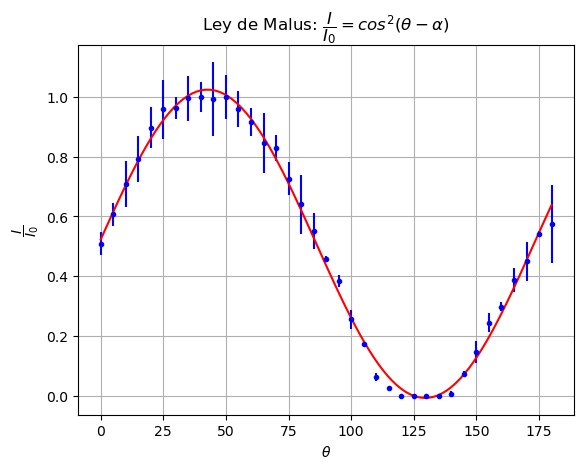

In [5]:
plt.errorbar(np.array(df.index),df['LuzProm'],yerr=5*df['ErrDom'],color='b',fmt='.')
xs = np.linspace(0,np.pi,100)
plt.plot(np.rad2deg(xs),func(xs,*params),'r')
plt.title(r'Ley de Malus: $\dfrac{I}{I_0}=cos^2(\theta-\alpha)$')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dfrac{I}{I_0}$')
plt.grid()
plt.show()

In [6]:
std = np.diagonal(cov)**0.5
print(f'I/I_0=({params[0]:.2f}±{std[0]:.2f})cos²(({params[1]:.3f}±{std[1]:.3f})θ-({params[2]:.2f}±{std[2]:.2f}))+({params[3]:.3f}±{std[3]:.3f})')

I/I_0=(1.03±0.01)cos²((1.036±0.006)θ-(0.77±0.01))+(-0.008±0.008)
